In [ ]:
##### Code the linear regression from scratch ######

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#### We are simulating some data for linear regression ######

x1=np.random.randint(low=1,high=20,size=(50,))

x2=np.random.randint(low=1,high=20,size=(50,))

In [ ]:
x1, x2

(array([11, 18, 15,  3, 13, 17, 12,  2,  3,  8, 13,  5, 14, 19,  5, 13,  4,
         4, 10,  5,  9, 17, 12, 14, 15, 17,  3,  6, 13,  9,  8,  9, 13,  8,
        12, 10,  3, 15, 12,  2, 10, 10,  8, 18,  9,  1,  4, 11, 14, 13]),
 array([11,  1, 13,  2, 10, 15,  2,  8,  1,  6, 19, 19, 11, 19, 19, 19, 10,
         5, 10,  2, 17,  8, 19, 19, 14, 11, 12,  4,  3, 13,  7, 18,  7,  5,
         7, 18, 16, 19, 10,  6, 17,  5,  2,  3, 19,  4,  4, 13,  7, 13]))

In [ ]:
y = 3 + 2*x1 -4*x2 + np.random.random((50,)) #### Actual target (Actual relationship)

In [ ]:
y

array([-1.86493808e+01,  3.56817216e+01, -1.80648801e+01,  1.47835951e+00,
       -1.07271738e+01, -2.22191520e+01,  1.99950597e+01, -2.41361710e+01,
        5.83912810e+00, -4.93987839e+00, -4.68905858e+01, -6.26346733e+01,
       -1.23631040e+01, -3.42575333e+01, -6.29126200e+01, -4.64900643e+01,
       -2.82505117e+01, -8.70360433e+00, -1.61111799e+01,  5.88956745e+00,
       -4.61812709e+01,  5.90803298e+00, -4.87345944e+01, -4.43999562e+01,
       -2.28878097e+01, -6.47826338e+00, -3.86179718e+01, -2.57058032e-03,
        1.70747090e+01, -3.06392292e+01, -8.92863357e+00, -5.00549446e+01,
        1.15728362e+00, -9.06063653e-02, -8.44151764e-01, -4.80502681e+01,
       -5.44141805e+01, -4.21395073e+01, -1.20131686e+01, -1.66892399e+01,
       -4.48464216e+01,  3.02211610e+00,  1.13363629e+01,  2.70657875e+01,
       -5.45685606e+01, -1.03505979e+01, -4.73119307e+00, -2.61206331e+01,
        3.95840819e+00, -2.20262640e+01])

In [ ]:
x1.shape

(50,)

In [ ]:
x2.shape

(50,)

In [ ]:
training_data = pd.DataFrame({'x1':x1,'x2':x2,'target':y})

In [ ]:
training_data

,x1,x2,target
0,11,11,-18.649381
1,18,1,35.681722
2,15,13,-18.064880
3,3,2,1.478360
4,13,10,-10.727174
5,17,15,-22.219152
6,12,2,19.995060
7,2,8,-24.136171
8,3,1,5.839128
9,8,6,-4.939878


In [ ]:
features = pd.DataFrame({'xo':np.ones_like(x1),'x1':x1,'x2':x2})

In [ ]:
features

,xo,x1,x2
0,1,11,11
1,1,18,1
2,1,15,13
3,1,3,2
4,1,13,10
5,1,17,15
6,1,12,2
7,1,2,8
8,1,3,1
9,1,8,6


In [ ]:
features_df = features.copy(deep = True) ### (50,3)
targets = y ### (50,)
weights = np.random.random(size = (3,)) #### Step-0 :random initialization ### (3,)

In [ ]:
weights.shape

(3,)

In [ ]:
###### Create a function to estimate the values of coefficients #####

features_df = features.copy(deep = True) ### (50,3)
targets = y ### (50,)
weights = np.random.random(size = (3,)) #### Step-0 :random initialization ### (3,)

def prediction(weights, features_df):
    predicted_vals = np.dot(features_df,weights) ## This will be an vector which contains predicted values for all obs in features_df, shape = (50,)
    return (predicted_vals)


def error (targets,predicted):
    error_val = (targets-predicted)  ### (50,)
    return (error_val)

def cost_val(error_val):
    cost = np.mean(error_val**2)  #### mean squared error value  ### scalar
    return (cost)


#### pred_y = wo*xo + w1*x1 + w2*x2

##### cost_funct = (y - (wo*xo +w1*x1 +w2*x2))^2

##### gradient (cost_fucnt)/wo = 2 * (y- wo*xo + w1*x1 + w2*x2) * xo


def gradients(error_val,features_df):
    error_val = np.reshape(error_val,newshape = (1,50))
    temp_gradients = np.dot(error_val,features_df) ### (1,3) ###[grad(wo), grad(w1), grad(w2)]
    temp_gradients = temp_gradients.T #### (3,1)
    temp_gradients = temp_gradients*(-2)
    temp_gradients = temp_gradients/(features_df.shape[0]) ## (3,1)
    grads = np.reshape(temp_gradients,-1) ###(3,)
    return(grads)


def linearReg(features_df,targets,weights,learning_rate,n_iter = 100):
  
  error_list= [] ### Store error after every upadte of weights

  for i in range(n_iter):
    ##### Step-1 : Compute prediction ###

    predict_vector = prediction(weights,features_df)

    ##### Step -2 : Compute cost #####

    error_vector = error(targets,predict_vector)
    
    cost_value = cost_val(error_vector) ## Mean squared error for the current predictions

    #### Step -3 : Gradient descent ######

    weights = weights - learning_rate * gradients(error_vector,features_df)
    
    error_list.append(cost_value)

    print("iteration : {} Cost : {}".format(i,cost_value))

  return(weights,error_list)

    

In [ ]:
coeffs,errors = linearReg(features_df,targets,weights,learning_rate = 0.001, n_iter = 50)

iteration : 0 Cost : 1367.5190542310984
iteration : 1 Cost : 593.2424826606266
iteration : 2 Cost : 373.1773783092313
iteration : 3 Cost : 297.0829927931572
iteration : 4 Cost : 259.6473800158401
iteration : 5 Cost : 233.72307437081946
iteration : 6 Cost : 212.20916243046958
iteration : 7 Cost : 193.15520610042142
iteration : 8 Cost : 175.94243846367382
iteration : 9 Cost : 160.30401325884966
iteration : 10 Cost : 146.07295772595478
iteration : 11 Cost : 133.11671072880083
iteration : 12 Cost : 121.31955750272593
iteration : 13 Cost : 110.57741013079129
iteration : 14 Cost : 100.79581624431361
iteration : 15 Cost : 91.88885351855613
iteration : 16 Cost : 83.77830440522752
iteration : 17 Cost : 76.39295114664091
iteration : 18 Cost : 69.66794574384558
iteration : 19 Cost : 63.54423931596537
iteration : 20 Cost : 57.968063269159465
iteration : 21 Cost : 52.89045706038349
iteration : 22 Cost : 48.26683824025722
iteration : 23 Cost : 44.05661095618718
iteration : 24 Cost : 40.2228094668017

In [ ]:
coeffs ### actual coefficients are 3,2,-4

array([ 0.78998215,  1.85970693, -3.65482756])

Text(0.5, 1.0, 'Cost with Iterations')

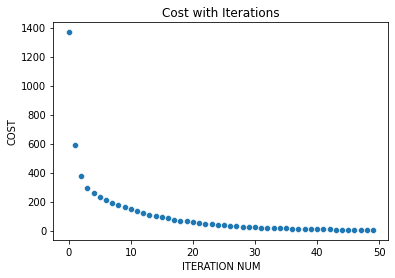

In [ ]:
##### Plotting the errors vs iteration #####

sns.scatterplot(x= range(len(errors)),y = errors)

plt.xlabel('ITERATION NUM')

plt.ylabel('COST')

plt.title('Cost with Iterations')

In [ ]:
#y = 3 + 2*x1 -4*x2 + np.random.random((50,))

coeffs

array([ 0.65499886,  2.11848904, -3.86466923])

In [ ]:
from sklearn.linear_model import LinearRegression  ### Deterministic way

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(features_df.iloc[:,1:],targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([ 2.00337915, -3.99934472])

In [ ]:
lr.intercept_

3.5043547044437666

In [ ]:
error = np.mean((targets - lr.predict(features_df.iloc[:,1:]))**2)

In [ ]:
error ## final error

0.0645130060901316